In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'HYGothic-Medium'

In [20]:
# 데이터 불러오기
data = pd.read_csv('../Data Collection/장애인 콜택시 이용 현황_전처리.csv', encoding='utf-8-sig')
data.head()

,운행시작,운행시작_시간,요일,구분
0,2021-01-03 19:14:00,19:14:00,일요일,저녁
1,2021-01-03 17:37:00,17:37:00,일요일,점심
2,2021-01-04 05:33:00,05:33:00,월요일,심야
3,2021-01-03 18:19:00,18:19:00,일요일,저녁
4,2021-01-02 16:34:00,16:34:00,토요일,점심


### 서울시 장애인 콜택시 이용 현황 (시간대별)

In [21]:
data['운행시작'] = pd.to_datetime(data['운행시작'] , errors='coerce') #오류 방지
data = data.set_index('운행시작')

In [22]:
# 시간대별 구분
data['운행시작_시간대별'] = 'N/A'

time01 = data.between_time('01:00:01', '02:00:00')
time02 = data.between_time('02:00:01', '03:00:00')
time03 = data.between_time('03:00:01', '04:00:00')
time04 = data.between_time('04:00:01', '05:00:00')
time05 = data.between_time('05:00:01', '06:00:00')
time06 = data.between_time('06:00:01', '07:00:00')
time07 = data.between_time('07:00:01', '08:00:00')
time08 = data.between_time('08:00:01', '09:00:00')
time09 = data.between_time('09:00:01', '10:00:00')
time10 = data.between_time('10:00:01', '11:00:00')
time11 = data.between_time('11:00:01', '12:00:00')
time12 = data.between_time('12:00:01', '13:00:00')
time13 = data.between_time('13:00:01', '14:00:00')
time14 = data.between_time('14:00:01', '15:00:00')
time15 = data.between_time('15:00:01', '16:00:00')
time16 = data.between_time('16:00:01', '17:00:00')
time17 = data.between_time('17:00:01', '18:00:00')
time18 = data.between_time('18:00:01', '19:00:00')
time19 = data.between_time('19:00:01', '20:00:00')
time20 = data.between_time('20:00:01', '21:00:00')
time21 = data.between_time('21:00:01', '22:00:00')
time22 = data.between_time('22:00:01', '23:00:00')
time23 = data.between_time('23:00:01', '00:00:00')
time24 = data.between_time('00:00:01', '01:00:00')

data.loc[time01.index, '운행시작_시간대별'] = '01시'
data.loc[time02.index, '운행시작_시간대별'] = '02시'
data.loc[time03.index, '운행시작_시간대별'] = '03시'
data.loc[time04.index, '운행시작_시간대별'] = '04시'
data.loc[time05.index, '운행시작_시간대별'] = '05시'
data.loc[time06.index, '운행시작_시간대별'] = '06시'
data.loc[time07.index, '운행시작_시간대별'] = '07시'
data.loc[time08.index, '운행시작_시간대별'] = '08시'
data.loc[time09.index, '운행시작_시간대별'] = '09시'
data.loc[time10.index, '운행시작_시간대별'] = '10시'
data.loc[time11.index, '운행시작_시간대별'] = '11시'
data.loc[time12.index, '운행시작_시간대별'] = '12시'
data.loc[time13.index, '운행시작_시간대별'] = '13시'
data.loc[time14.index, '운행시작_시간대별'] = '14시'
data.loc[time15.index, '운행시작_시간대별'] = '15시'
data.loc[time16.index, '운행시작_시간대별'] = '16시'
data.loc[time17.index, '운행시작_시간대별'] = '17시'
data.loc[time18.index, '운행시작_시간대별'] = '18시'
data.loc[time19.index, '운행시작_시간대별'] = '19시'
data.loc[time20.index, '운행시작_시간대별'] = '20시'
data.loc[time21.index, '운행시작_시간대별'] = '21시'
data.loc[time22.index, '운행시작_시간대별'] = '22시'
data.loc[time23.index, '운행시작_시간대별'] = '23시'
data.loc[time24.index, '운행시작_시간대별'] = '24시'

In [23]:
data_time_counting = data['운행시작_시간대별'].value_counts()
data_time_counting_sort = data_time_counting.sort_index()

In [24]:
# 라벨링 만들기
labels = []
for i in data_time_counting_sort.index:
    labels.append(i)
print(labels)

['01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']


In [25]:
# 값(values 설정)
values = data_time_counting_sort.values
label = "콜택시"

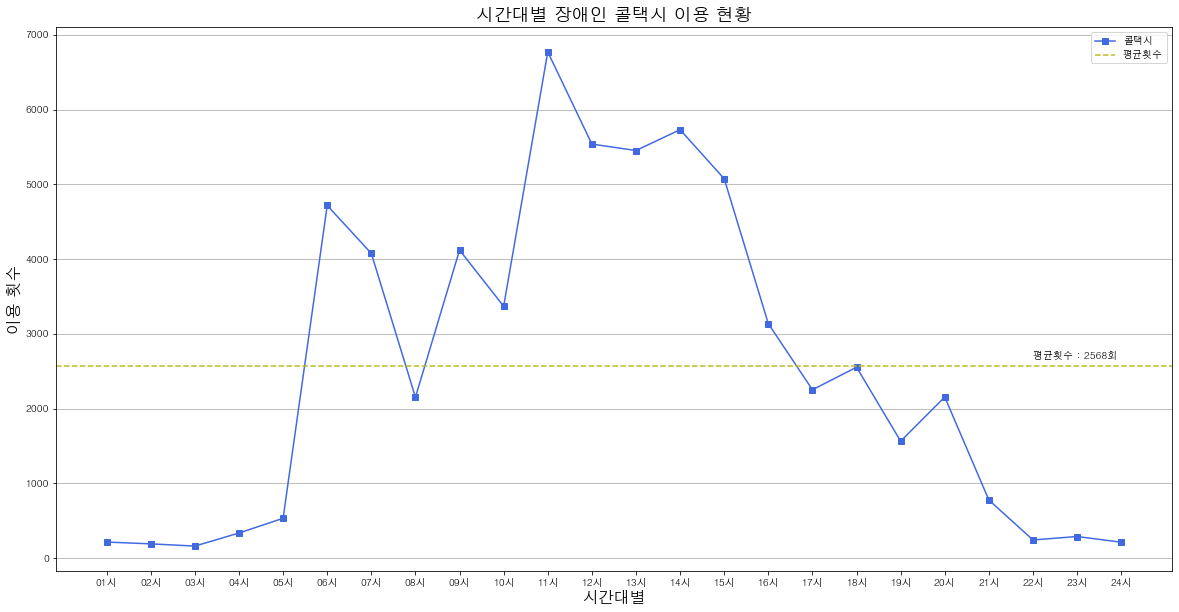

In [26]:
# 이용현황 시각화
plt.figure(figsize=(20,10))
plt.plot(labels, values, marker='s' , color='royalblue' , label=label)
plt.grid(axis='y')
plt.axhline(y= values.mean(), linestyle='--', color='C8', label="평균횟수")
plt.text(21 , values.mean()+100 , f'평균횟수 : {round(values.mean() , )}회')
plt.title("시간대별 장애인 콜택시 이용 현황" , fontsize = 18)
plt.xlabel('시간대별' , fontsize= 16)
plt.ylabel('이용 횟수' , fontsize = 16)
plt.legend()
plt.show()

### 서울시 장애인 콜택시 이용 현황 (요일별)

In [27]:
#월요일
monday = data[data['요일']=='월요일']
monday_day = monday['구분'].value_counts(normalize=True)
# print(round(monday_day*100))
#점심    45.0
# 아침    39.0
# 저녁    13.0
# 심야     3.0

tuesday = data[data['요일']=='화요일']
tuesday_day = tuesday['구분'].value_counts(normalize=True)
# print(round(tuesday_day*100))
# 점심    45.0
# 아침    41.0
# 저녁    12.0
# 심야     2.0

wday = data[data['요일']=='수요일']
wday_day = wday['구분'].value_counts(normalize=True)
# print(round(wday_day*100))
# 점심    44.0
# 아침    42.0
# 저녁    11.0
# 심야     2.0

thursday = data[data['요일']=='목요일']
thursday_day = thursday['구분'].value_counts(normalize=True)
# print(round(thursday_day*100))
# 점심    44.0
# 아침    42.0
# 저녁    12.0
# 심야     2.0

friday = data[data['요일']=='금요일']
friday_day = friday['구분'].value_counts(normalize=True)
# print(round(friday_day*100))
# 점심    44.0
# 아침    42.0
# 저녁    11.0
# 심야     3.0

saturday = data[data['요일']=='토요일']
saturday_day = saturday['구분'].value_counts(normalize=True)
print(round(saturday_day*100))
# 아침    43.0
# 점심    40.0
# 저녁    14.0
# 심야     4.0

sunday = data[data['요일']=='일요일']
sunday_day = sunday['구분'].value_counts(normalize=True)
print(round(sunday_day*100))
# 점심    45.0
# 아침    36.0
# 저녁    15.0
# 심야     4.0

아침    43.0
점심    40.0
저녁    14.0
심야     4.0
Name: 구분, dtype: float64
점심    45.0
아침    36.0
저녁    15.0
심야     4.0
Name: 구분, dtype: float64


In [28]:
# 아침
morning = data[data['구분']=='아침']
morning_day = morning['요일'].value_counts()
morning_dayday = morning_day.reindex(['월요일' , '화요일' , '수요일' , '목요일' , '금요일' , '토요일' , '일요일']) # 순서대로 reindex
morning_values = morning_dayday.values

# 점심
afternoon = data[data['구분']=='점심']
afternoon_day = afternoon['요일'].value_counts()
afternoon_dayday = afternoon_day.reindex(['월요일' , '화요일' , '수요일' , '목요일' , '금요일' , '토요일' , '일요일']) # 순서대로 reindex
afternoon_values = afternoon_dayday.values

#저녁
evening = data[data['구분']=='저녁']
evening_day = evening['요일'].value_counts()
evening_dayday = evening_day.reindex(['월요일' , '화요일' , '수요일' , '목요일' , '금요일' , '토요일' , '일요일']) # 순서대로 reindex
evening_values = evening_dayday.values

#심야
midnight = data[data['구분']=='심야']
midnight_day = midnight['요일'].value_counts()
midnight_dayday = midnight_day.reindex(['월요일' , '화요일' , '수요일' , '목요일' , '금요일' , '토요일' , '일요일']) # 순서대로 reindex
midnight_values = midnight_dayday.values

labels = []
for i in morning_dayday.index:
    labels.append(i)

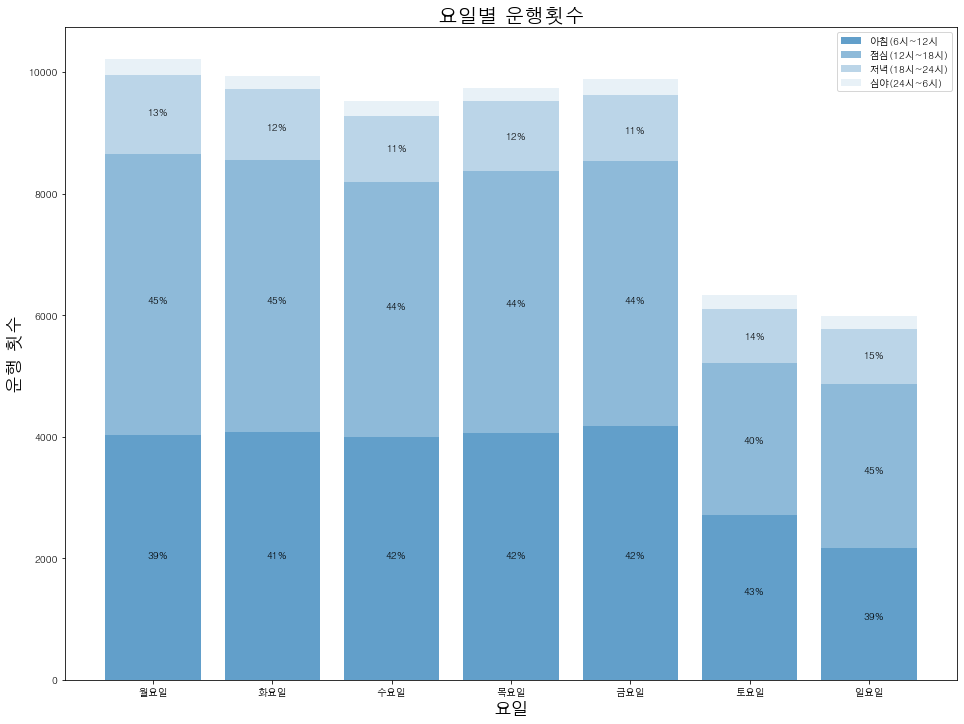

In [29]:
plt.figure(figsize=(16,12))
plt.title('요일별 운행횟수', fontsize=20)
plt.ylabel('운행 횟수', fontsize=18)
plt.xlabel('요일', fontsize=18)
p_morning = plt.bar(labels, morning_values, color='C0',  label='아침(6시~12시' , alpha=0.7)
p_afternoon = plt.bar(labels, afternoon_values, color='C0' ,  label='점심(12시~18시)' , alpha=0.5,
                      bottom=morning_values)
p_evening = plt.bar(labels, evening_values, color = 'C0' ,  label = '저녁(18시~24시)' ,alpha=0.3,
                    bottom=afternoon_values+morning_values)
p_midnight = plt.bar(labels, midnight_values , color = 'C0' ,  label = '심야(24시~6시)', alpha=0.1,
                     bottom=morning_values+afternoon_values+evening_values)

plt.text(-0.05, 2000 , '39%' , fontsize=10) #월/아침
plt.text(0.95, 2000 , '41%' , fontsize=10) # 화/아침
plt.text(1.95, 2000 , '42%' , fontsize=10) # 수/아침
plt.text(2.95, 2000 , '42%' , fontsize=10) #목/아침
plt.text(3.95, 2000 , '42%' , fontsize=10) #금/아침
plt.text(4.95, 1400 , '43%' , fontsize=10) #토/아침
plt.text(5.95, 1000 , '39%' , fontsize=10) #일/아침

plt.text(-0.05, 6200 , '45%' , fontsize=10) #월/점심
plt.text(0.95, 6200 , '45%' , fontsize=10) #화/점심
plt.text(1.95, 6100 , '44%' , fontsize=10) #수/점심
plt.text(2.95, 6150 , '44%' , fontsize=10) #목/점심
plt.text(3.95, 6200 , '44%' , fontsize=10) #금/점심
plt.text(4.95, 3900 , '40%' , fontsize=10) #토/점심
plt.text(5.95, 3400 , '45%' , fontsize=10) #일/점심

plt.text(-0.05, 9300 , '13%' , fontsize=10) #월/저녁
plt.text(0.95, 9050 , '12%' , fontsize=10) #화/저녁
plt.text(1.95, 8700 , '11%' , fontsize=10) #수/저녁
plt.text(2.95, 8900 , '12%' , fontsize=10) #목/저녁
plt.text(3.95, 9000 , '11%' , fontsize=10) #금/저녁
plt.text(4.95, 5600 , '14%' , fontsize=10) #토/저녁
plt.text(5.95, 5300 , '15%' , fontsize=10) #일/저녁

# plt.text(0, 1050 , f'평균횟수 ff:회')
plt.legend()
plt.show()